In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
import numpy as np
import copy
import random

In [72]:
def visualize_graph(G, title="Graph Visualization", seed=42):
    plt.figure(figsize=(18,8), facecolor='#5e5e5e')
    ax = plt.gca()
    ax.set_facecolor('#5e5e5e')
    pos = nx.spring_layout(G, weight=None, seed=seed)  # You can use other layouts as well

    # Check if edges have weights
    if nx.get_edge_attributes(G, 'weight'):
        # If weights exist, use them for edge coloring
        edge_weights = np.array([G[u][v].get('weight', 1) for u, v in G.edges()])
        cmap = plt.cm.plasma
        norm_weights = (edge_weights - edge_weights.min()) / (edge_weights.max() - edge_weights.min())
        min_alpha = 0.1  # Minimum alpha for visibility
        alphas = norm_weights * (1 - min_alpha) + min_alpha
        edge_colors = [cmap(weight) for weight in norm_weights]
        edge_colors_with_alpha = [(r, g, b, a) for (r, g, b, _), a in zip(edge_colors, alphas)] # Use weights for edge coloring
    else:
        # If no weights, set all edges to the same color (e.g., gray)
        edge_colors_with_alpha = 'blue'
        edge_weights = None  # No weights present

    # Draw edges
    nx.draw_networkx_edges(
        G,
        pos,
        arrowsize=10,
        edge_color=edge_colors_with_alpha,
        width=2,
    )

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=min(5000/G.number_of_nodes(), 200))
    
    # If edge weights exist, create colorbar based on scalar values (not RGBA tuples)
    if edge_weights is not None:
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=edge_weights.min(), vmax=edge_weights.max()))
        sm.set_array([])  # Create an empty array for the ScalarMappable
        plt.colorbar(sm, label='Edge Weight', orientation='vertical', fraction=0.046, pad=0.04)
    
    plt.title(title)
    plt.show()

In [3]:
def generate_sf_graph(n):
    G = nx.scale_free_graph(n=n,alpha=.5,beta=.25,gamma=.25).to_undirected()
    G.remove_edges_from(list(nx.selfloop_edges(G)))
    G = nx.Graph(G)
    G = nx.convert_node_labels_to_integers(G)
    components = list(nx.connected_components(G))
    while len(components) > 1:
        G.add_edge(components[0].pop(), components[1].pop())
        components = list(nx.connected_components(G))
    return G

In [4]:
def add_weights_to_edges_from_dict(graph, weights_dict):
    for edge, weight in weights_dict.items():
        if graph.has_edge(*edge):
            graph[edge[0]][edge[1]]['weight'] = weight
        elif graph.has_edge(*reversed(edge)):
            graph[reversed(edge)[0]][reversed(edge)[1]]['weight'] = weight
        else:
            print(f"Edge {edge} not found in the graph.")

In [5]:
G = generate_sf_graph(50)

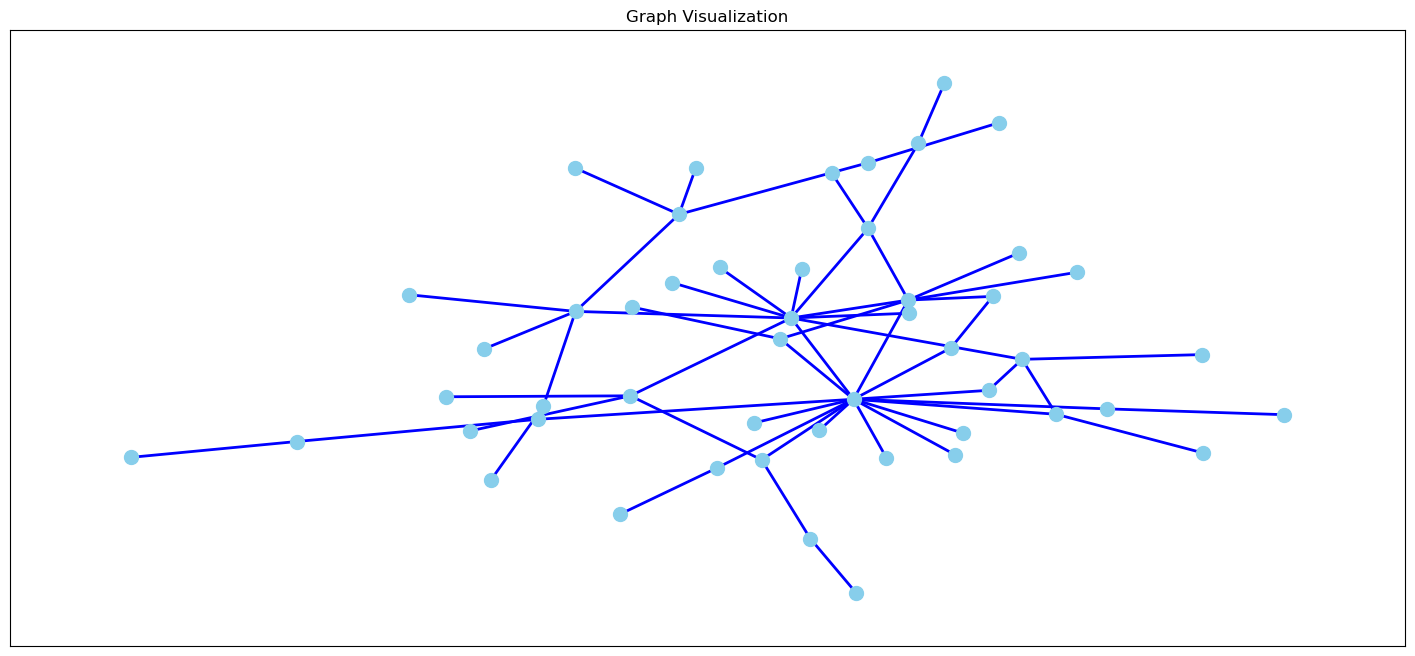

In [6]:
visualize_graph(G)

In [7]:
BA = nx.barabasi_albert_graph(300,m =1,)

C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_7524\2111593049.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Edge Weight', orientation='vertical', fraction=0.046, pad=0.04)


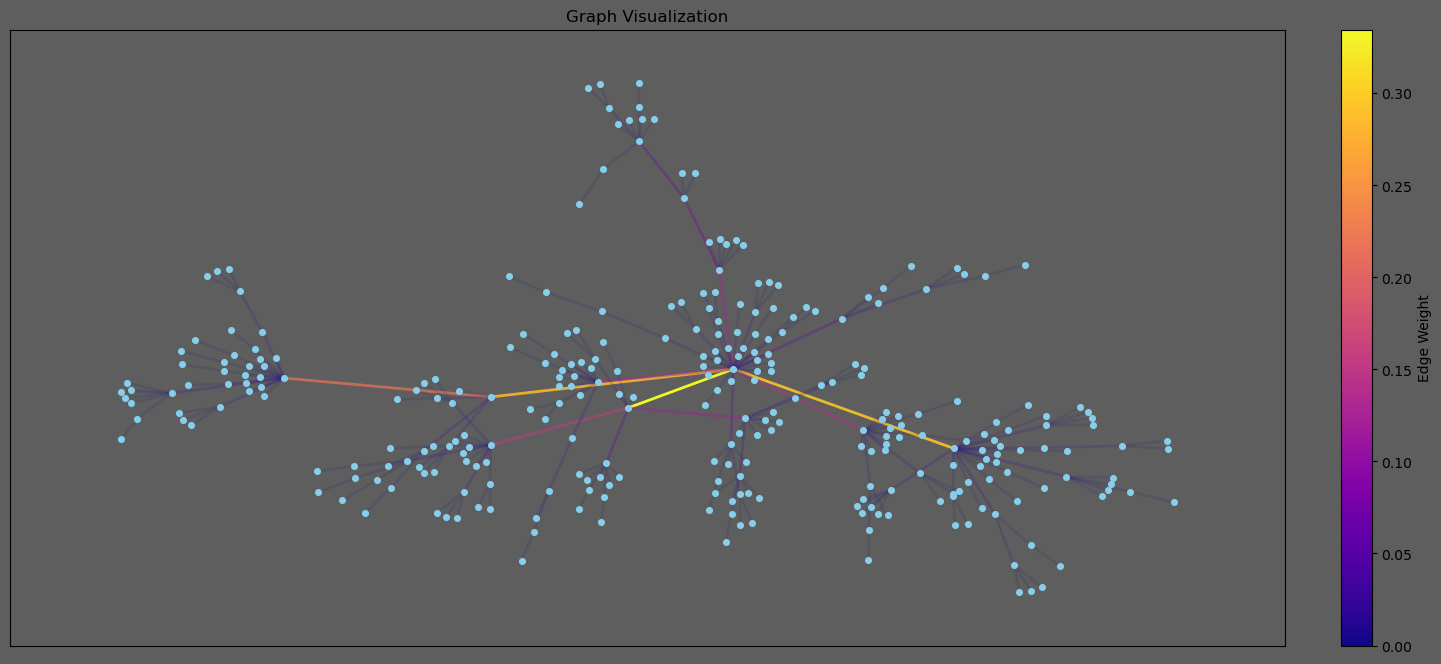

In [68]:
visualize_graph(BA)

In [9]:
add_weights_to_edges_from_dict(BA,nx.betweenness_centrality(nx.line_graph(BA)))
#print(nx.betweenness_centrality(nx.line_graph(BA)))

In [10]:
weights = [BA[u][v]['weight'] for u, v in BA.edges()]

C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_7524\3405962922.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Edge Weight', orientation='vertical', fraction=0.046, pad=0.04)


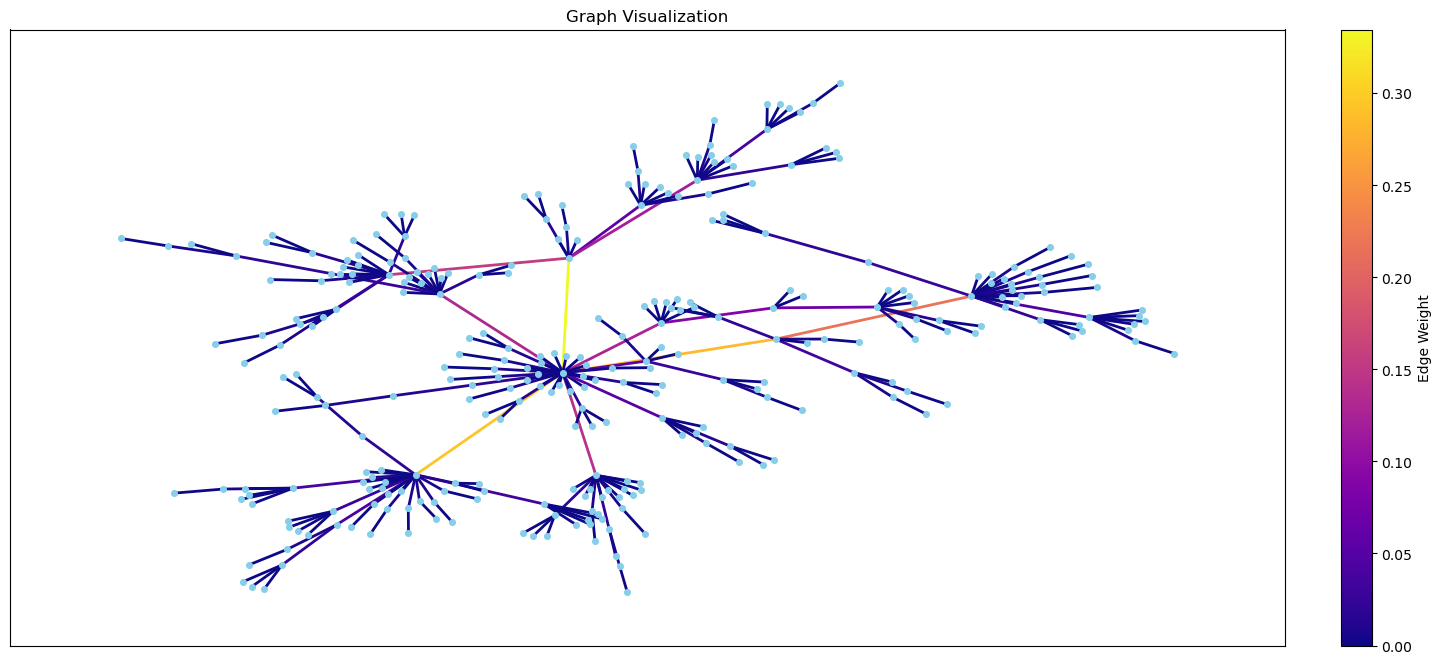

In [11]:
visualize_graph(BA)

In [98]:
max(weights)

0.5003728620731935

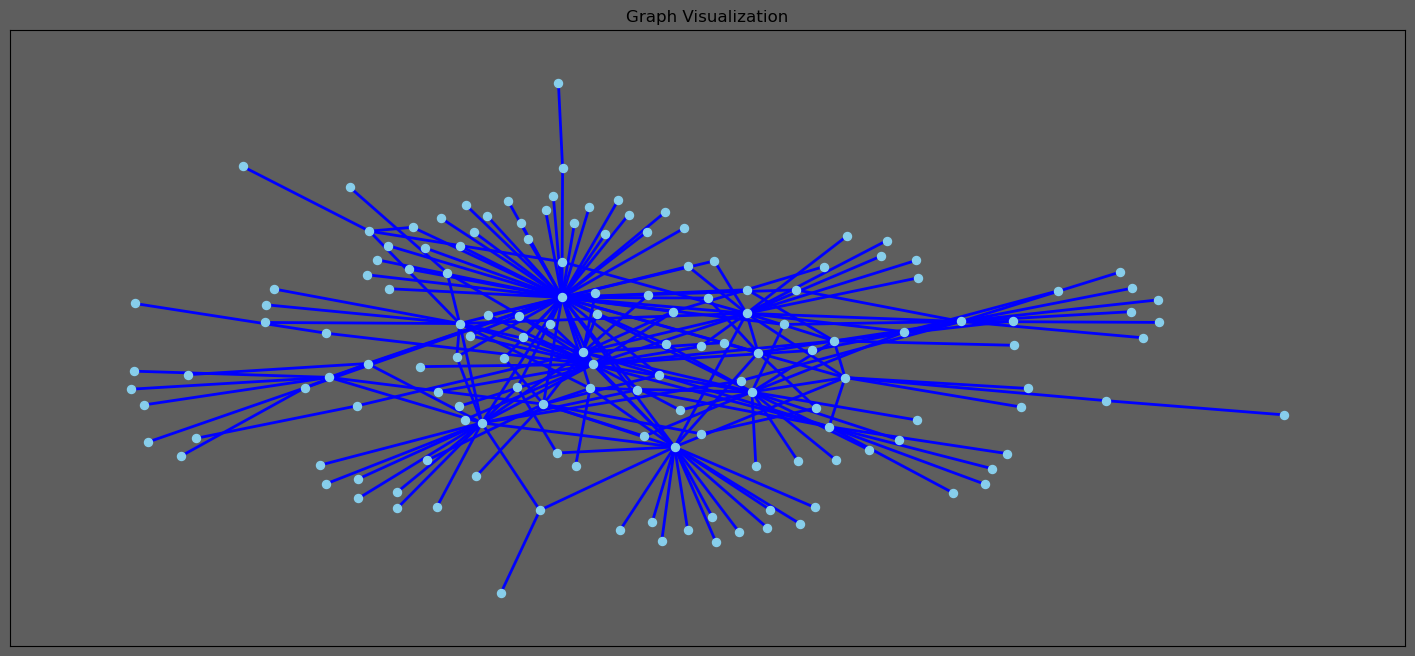

In [69]:
G = nx.scale_free_graph(n=150,alpha=.41).to_undirected()
G.remove_edges_from(list(nx.selfloop_edges(G)))
G = nx.Graph(G)
visualize_graph(G)

In [65]:
SF = copy.deepcopy(G)
PR = copy.deepcopy(G)
DR = copy.deepcopy(G)


add_weights_to_edges_from_dict(SF,nx.betweenness_centrality(nx.line_graph(SF)))
add_weights_to_edges_from_dict(DR,nx.degree_centrality(nx.line_graph(DR)))
add_weights_to_edges_from_dict(PR,nx.pagerank(nx.line_graph(SF),max_iter=500))


C:\Users\Kocsis Máté\AppData\Local\Temp\ipykernel_7524\2856266045.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Edge Weight', orientation='vertical', fraction=0.046, pad=0.04)


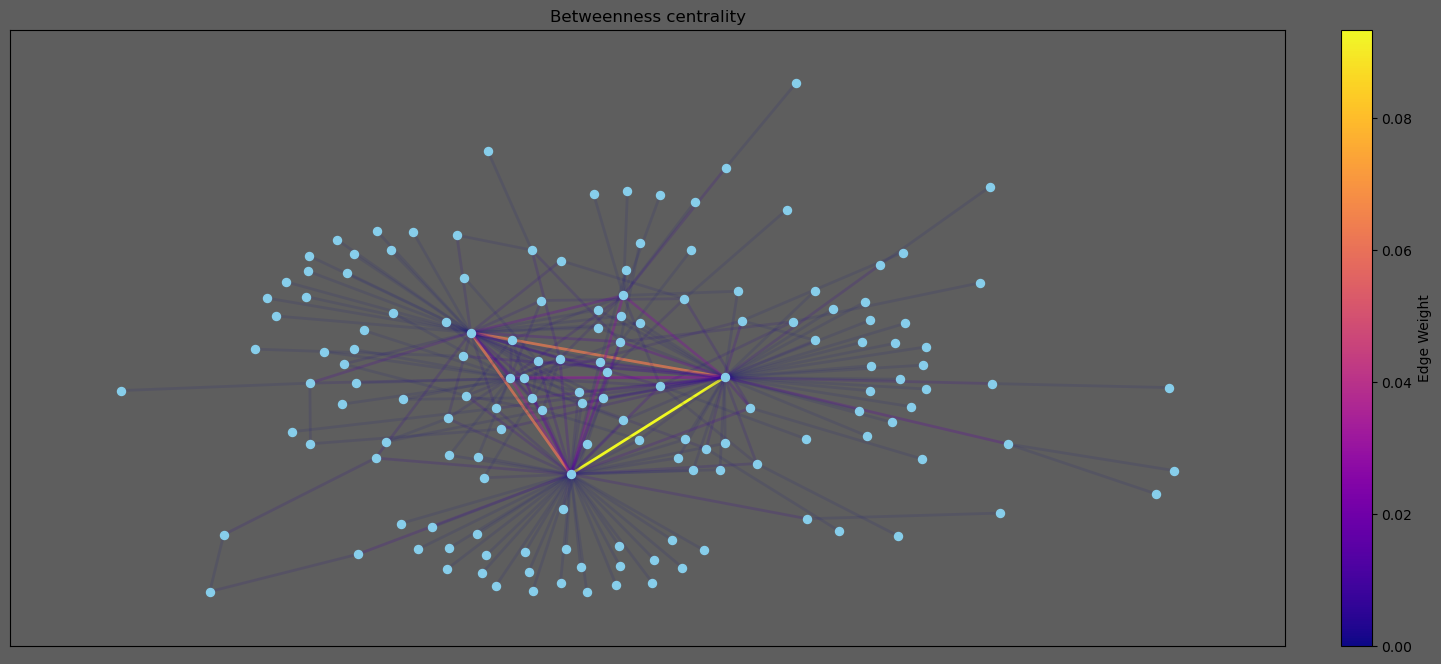

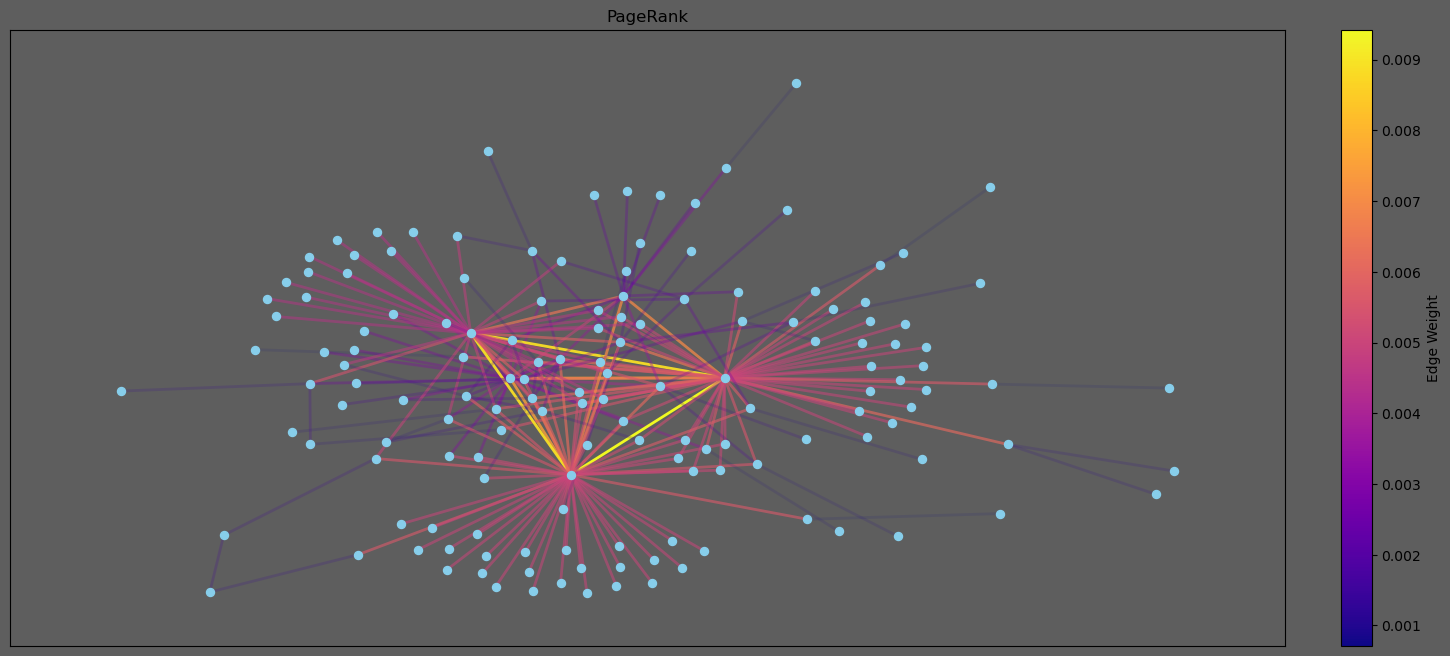

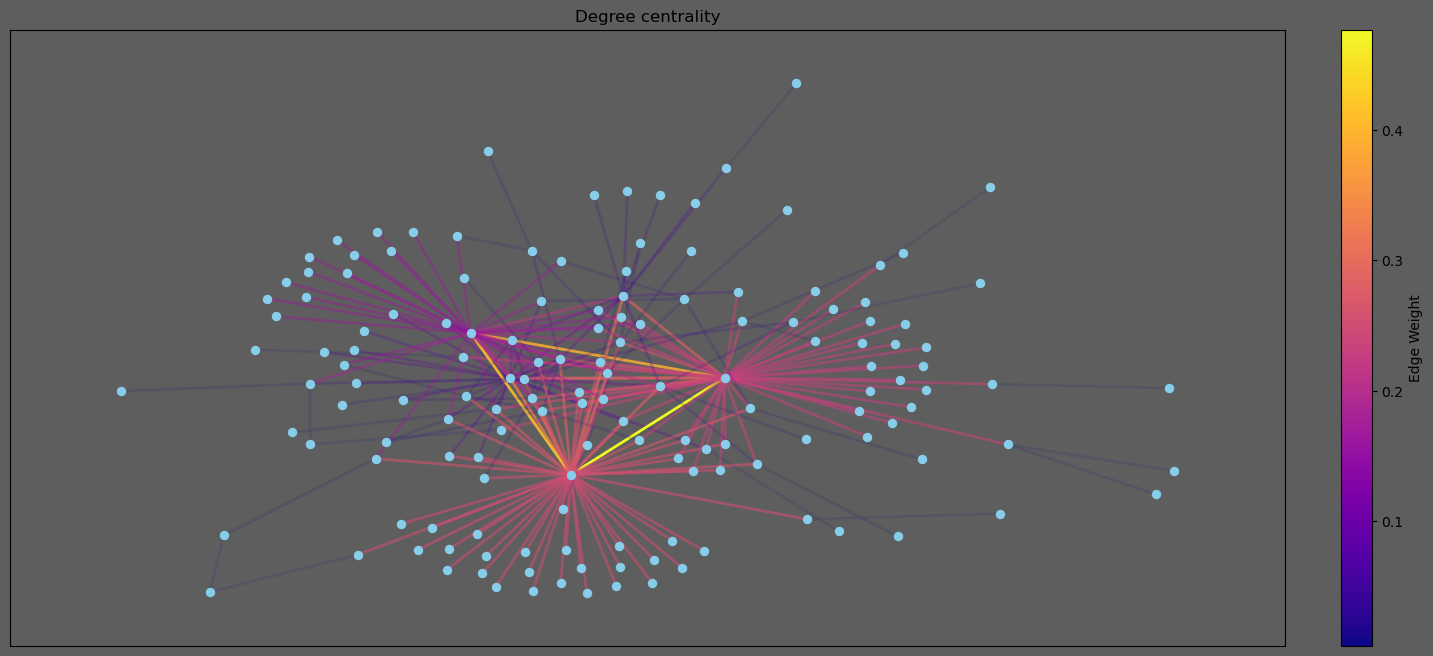

In [73]:
visualize_graph(SF, "Betweenness centrality")
visualize_graph(PR, "PageRank")
visualize_graph(DR, "Degree centrality")
